In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#loading the data
#df_trade = pd.read_parquet('data/clean/vwap/trade/2007-01-01-to-2007-01-31-vwap-trade-1min.parquet')
from upload_data import upload_clean_data


df_trade = upload_clean_data('data/clean/vwap/trade')

In [27]:
#rename column minute into time
df_trade.rename(columns={'minute':'time'}, inplace=True)
#set index to datetime
df_trade['time'] = pd.to_datetime(df_trade['time'])
df_trade.set_index('time', inplace=True)

# Create a pivot table with the count of VWAP values for each ticker and minute
df_trade_pivot = df_trade.pivot_table(index='time', columns='ticker', values='vwap')
df_trade_pivot

ticker,AA.N,ABT.N,AEP.N,ALL.N,AVP.N,AXP.N,BA.N,BAC.N,BAX.N,BHI.N,...,USB.N,UTX.N,VZ.N,WAG.N,WFC.N,WMB.N,WMT.N,WY.N,XOM.N,XRX.N
time,,,,,,,,,,,,,,,,,,,,,
2007-01-03 14:30:00,NaN,48.833295,NaN,65.136305,32.915633,NaN,88.990662,53.296366,46.399533,NaN,...,35.618661,62.607905,NaN,45.898943,NaN,NaN,47.100020,NaN,NaN,16.969097
2007-01-03 14:31:00,29.886544,48.924805,42.493664,65.287679,33.012088,NaN,88.969032,53.318827,46.476087,NaN,...,35.976306,62.950885,NaN,46.174609,NaN,NaN,47.132193,NaN,NaN,16.979139
2007-01-03 14:32:00,29.902933,48.979192,42.512895,65.470427,33.068729,NaN,89.201183,53.340640,46.495968,NaN,...,36.050842,62.945503,NaN,46.298085,NaN,25.999167,47.158139,71.058492,75.669337,17.017634
2007-01-03 14:33:00,29.950623,48.998300,42.605600,65.631029,33.128783,NaN,89.462869,53.402308,46.647692,73.626691,...,36.092998,62.979286,NaN,46.351843,NaN,25.889940,47.265910,71.283016,75.703973,17.060000
2007-01-03 14:34:00,29.979737,48.979465,42.672500,65.646750,33.136750,NaN,89.332162,53.558971,46.694630,73.079487,...,36.111881,62.974128,37.953035,46.299185,NaN,25.767747,47.399939,71.465120,75.514586,17.066284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31 20:55:00,36.560981,56.155882,46.508000,NaN,39.630403,52.133406,87.423750,41.275030,58.022308,81.292982,...,31.738466,76.533636,43.739960,38.120886,30.246521,35.781935,47.503070,73.610392,93.784171,16.209150
2007-12-31 20:56:00,36.574200,56.169824,46.529054,NaN,39.630339,52.145075,87.442086,41.252008,58.004516,81.282006,...,31.743791,76.575612,43.740696,38.106497,30.236259,35.774172,47.512157,73.612917,93.848107,16.204970
2007-12-31 20:57:00,36.542786,56.118265,46.487333,NaN,39.629545,52.103602,87.446286,41.215212,57.977316,81.207566,...,31.712425,76.506640,43.715757,38.062545,30.203382,35.772013,47.500621,73.613444,93.810598,16.182285


ValueError: The number of FixedLocator locations (41), usually from a call to set_ticks, does not match the number of labels (82).

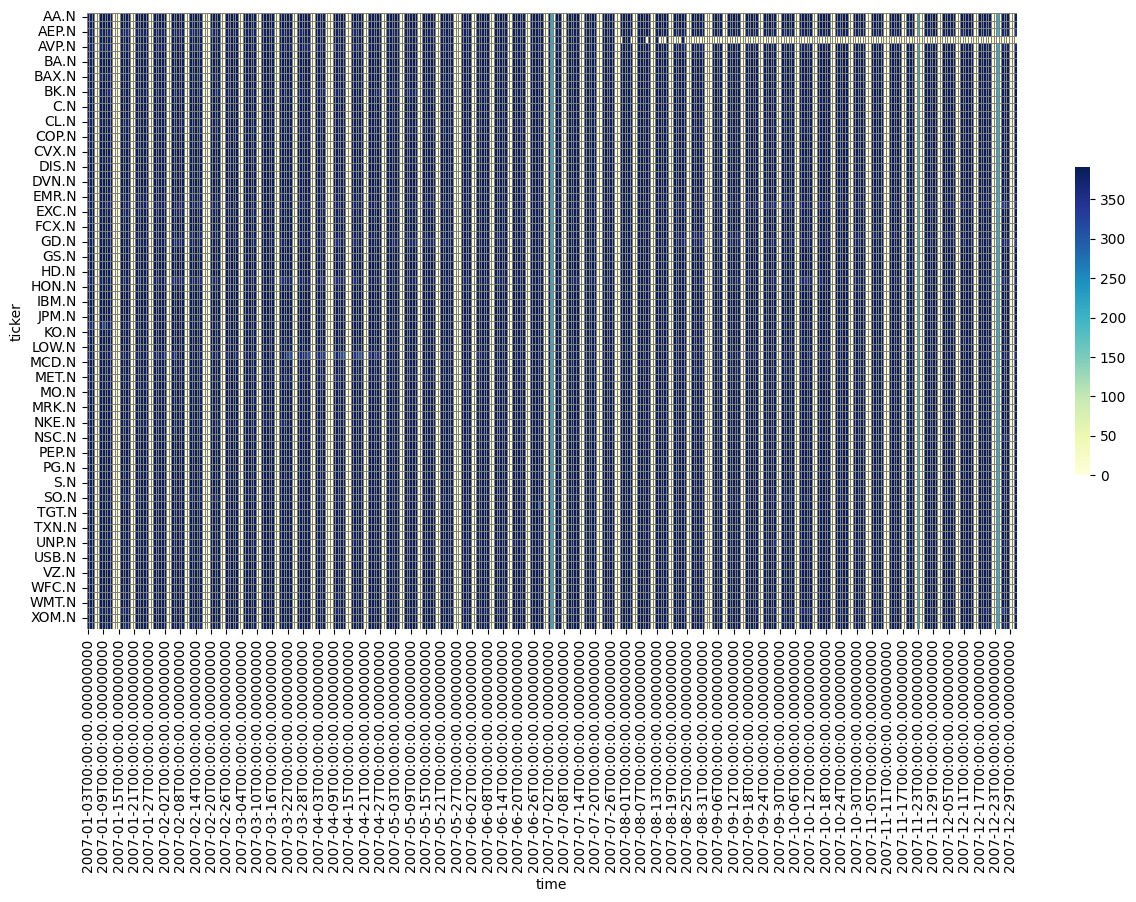

In [45]:
import matplotlib.ticker as ticker
daily_data_count = df_trade_pivot.resample('D').count() 

# Use the count of data points as values for the heatmap
# If there's no data for a day, it will be NaN, which will be shown as a white space in the heatmap
pivot_table = daily_data_count.transpose()

# Create the heatmap

# Create the heatmap with figsize adjusted for better visibility
plt.figure(figsize=(15, 8))
ax = sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5, linecolor='grey', cbar_kws={"shrink": .5})

# Set the tick labels for y-axis with all the ticker names
ax.set_yticklabels(pivot_table.index, rotation=0)

# Set the tick labels for x-axis to show all the dates
ax.set_xticklabels(pivot_table.columns.strftime('%Y-%m-%d'), rotation=90)

# Ensure every ticker label is shown
ax.yaxis.set_major_locator(ticker.MaxNLocator(len(pivot_table.index)))

plt.show()



We now count the average number of data point per day with data for every stock

In [25]:
# Calculate the number of data points per day for each stock
daily_data_count = df_trade_pivot.resample('D').count()

# Count the number of days with data for every stock
days_with_data = (daily_data_count > 0).sum()

# Calculate the average number of data points per day with data for every stock
average_data_points = daily_data_count.sum() / days_with_data

average_data_points.sort_values(ascending=False, inplace=True)
print(average_data_points)



ticker
GE.N     387.828685
HPQ.N    387.617530
JNJ.N    387.613546
PFE.N    387.545817
IBM.N    387.545817
            ...    
AEP.N    377.892430
GD.N     377.258964
ETR.N    375.565737
HNZ.N    375.239044
MA.N     375.011952
Length: 82, dtype: float64


In [49]:
#Minimum number of data points per day for each stock during the trading days
print(daily_data_count[daily_data_count>0].min().sort_values())

ticker
ETR.N    193.0
AEP.N    197.0
MA.N     198.0
WY.N     198.0
GD.N     198.0
         ...  
HPQ.N    211.0
IBM.N    211.0
JNJ.N    211.0
FCX.N    211.0
JPM.N    211.0
Length: 82, dtype: float64


In [51]:
#Maximum number of data points per day for each stock during the trading days
print(daily_data_count[daily_data_count>0].max().sort_values())

ticker
AA.N     390.0
PFE.N    390.0
PEP.N    390.0
OXY.N    390.0
NSC.N    390.0
         ...  
GE.N     391.0
MDT.N    391.0
GS.N     391.0
HD.N     391.0
JPM.N    391.0
Length: 82, dtype: float64
